Name: Sonam Rinzin Gurung <br>
University ID: 2059524

# Regression Task

---


### Linear Regression
Linear Regression is a supervised machine learning algorithm which is used to find the linear relationship between a single dependent variable and multiple independent variables. Linear regression is used to create models which can predict the value of the dependent(target) variable based on its relationship with the independent variables. The indpendent variables are also called features or predictors.<br>
The eqation of best fit line for linear regresssion with multiple predictors is:<br>
**y = b1x1 + b2x2 +...+bnxn +c**  <br>
where,<br>
 b1,b2.. are the bias coefficients also called theta<br>
x1,x2.. are the predictors <br>
c is the intercept value <br><br>
Theta values are initialized randomly at first. Then gradient descent is used to update the theta values to minimize the cost function.

---



### Housing Price Prediction

In [1]:
#importing required python libraries
#numpy allows us to calculate mathematical equations and problems
import numpy as np

#pandas is a open source data analysis and manipulation library
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


Uploading the dataset into this colab notebook.

In [2]:
from google.colab import files

#saving the uploaded file in uploaded
uploaded = files.upload()

Saving Housing.csv to Housing.csv


Using pandas to read the uploaded csv file as a dataframe (housedf)

In [3]:
import io


housedf = pd.read_csv(io.BytesIO(uploaded['Housing.csv']))

## Dataset Description
This dataset contains the price of housing along with its various facilities and features such as no.of bathrooms, bedrooms, area, avaibility of hotwaterheating, etc. <br>
The price of housing is effected by its features such as the area of the house, no.of rooms, parking areas, etc. Facilities such as airconditioning and water heater can also effect the price of the house.<br>
The goal is to use all the relevant independent variables to predict the price of housing. Initially we have 12 independent variables. Price is the target variable.

In [4]:
housedf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Description
## Independent Variables / Predictors


1. area : Total area of the house
2. bedrooms : Number of bedrooms
3. bathrooms : Number of bathrooms
4. stories : Number of floors in the house
5. mainroad : House is connected to a main road (Yes/No)
6. guestroom : Room for guests (Yes/No)
7. basement : Basement is a room below the ground floor of a house (Yes/No)
8. hotwaterheating : Availability of hot water heating (Yes/No)
9. airconditioning : Availability of airconditioning (Yes/No)
10. parking : Number of cars that can be parked
11. prefarea : Tells if house is in preferenced area (Yes/No)
12. furnishingstatus : Status of amount of furnitures in the house (furnished/semi-furnished/un-furnished)
## Dependent Variable / Target Variable 
**price** : Total Price of the house




In [5]:
#checking the size of the dataframe
housedf.shape

(545, 13)

In [6]:
#checking information of the data in dataframe
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
#checking the unique values in the furnishingstatus column
housedf.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

## Observations:

* Data size is 545 rows and 13 columns

*  6 columns have int data, 7 columns have object data

* None of the columns has Null values

* The columns: [ 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking' ] have numerical  values

* The columns: [ 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning' , 'prefarea' ] have yes/no values

* The column: ['furnishingstatus'] has three values : 'furnished', 'semi-furnished' and 'unfurnished'



---


# Data Analysis

### Checking Correlation between variables
**Correlation** is used to find relationship between different variables in the dataframe. The statistical relationship between two variables is referred to as their correlation.
* A positive correlation means the variables move in the same direction.
* A negative correlation means that the two variables are inversely related.
* A neutral correlation means that the two variables have no relationship.

In [8]:
#finding the correlation using the corr() function
#corr() function displays a correlation matrix of the dataframe
coRel=round(housedf.corr(),2)
coRel

,price,area,bedrooms,bathrooms,stories,parking
price,1.00,0.54,0.37,0.52,0.42,0.38
area,0.54,1.00,0.15,0.19,0.08,0.35
bedrooms,0.37,0.15,1.00,0.37,0.41,0.14
bathrooms,0.52,0.19,0.37,1.00,0.33,0.18
stories,0.42,0.08,0.41,0.33,1.00,0.05
parking,0.38,0.35,0.14,0.18,0.05,1.00


Visualizin the above Correlation matrix of the dataframe using seaborn heatmap.

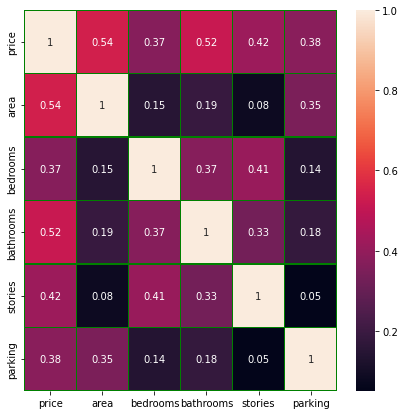

In [9]:
#using sns heatmap to plot the correlation matrix coRel

plt.figure(figsize= (7,7)) #size of figure

#annot displays the correlation data in each box of heatmap
sns.heatmap(coRel,annot=True,linewidths=0.5, linecolor='green')
plt.show()

---
Plotting a Relation Plot between the price and area of housing. This shows the relationship between the two varaibles more clearly.

From below plot, we can observe that the price of house increases with increase in area. These two variables are positively correlated.

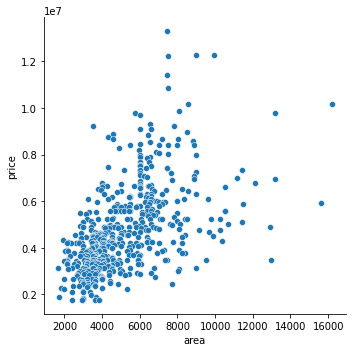

In [10]:
# using the seaborn relplot to plot a scatter plot between area and price

sns.relplot(data = housedf, x = 'area', y = 'price')
plt.show()

Checking the relation of price with other independent variable as well. Visualizing the relation using scatter plot.

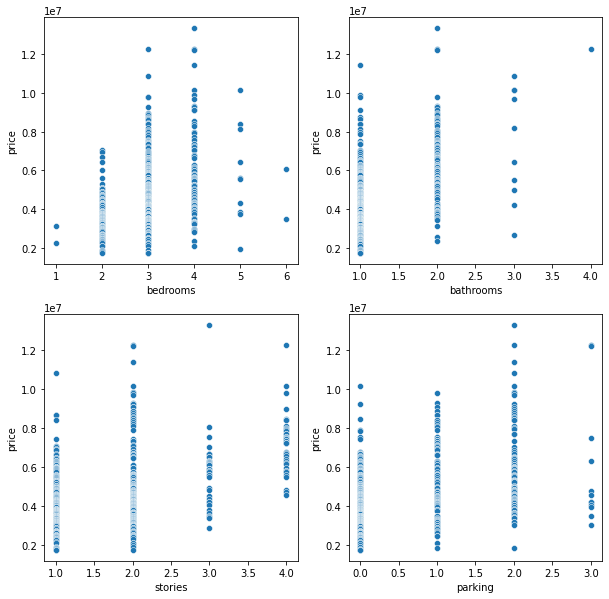

In [11]:
#using seaborn scatter plot
#using subplot to plot multiple plots on one figure

plt.figure(figsize=(10,10))

#making a plot figure having 2 rows and 2 columns to fit 4 plots

plt.subplot(2,2,1) #2 rows, 2 columns , 1st index
#bedrooms against price
sns.scatterplot(data = housedf, x = 'bedrooms', y = 'price')

plt.subplot(2,2,2) #2 rows, 2 columns , 2nd index
#bathrooms against price
sns.scatterplot(data = housedf, x = 'bathrooms', y = 'price')

plt.subplot(2,2,3) #2 rows, 2 columns , 3rd index
#stories against price
sns.scatterplot(data = housedf, x = 'stories', y = 'price')

plt.subplot(2,2,4) #2 rows, 2 columns , 4th index
#parking against price
sns.scatterplot(data = housedf, x = 'parking', y = 'price')

plt.show()

**Box Plot** <br>
Box plot displays the five number summary of a set of data. The five number summary is minimum, first quartile, median, third quartile and maximum.<br>
In a box plot, the box represents the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.<br><br>
Plotting box plots of price and area.

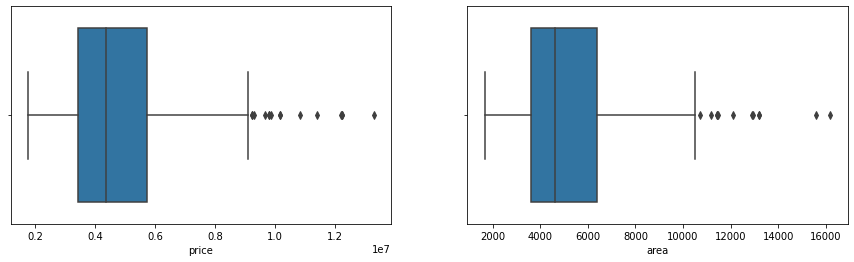

In [12]:
#using subplot to plot two plots in one figure

plt.figure(figsize=(15,4))

plt.subplot(1,2,1) #2 rows 3 cols 1st index
sns.boxplot(x='price',data=housedf)

plt.subplot(1,2,2) #2 rows 3 cols 2nd index
sns.boxplot(x='area',data=housedf)

plt.show()

From above box plot, we can visualize some outliers in both price and area.

---



**Histogram Plot** <br>
Histogram is a graph used to visualize the frequency distribution of a set of data. It is also used for inspection of the data to detect its underlying distribution, outliers, skewness, etc.<br><br>
Plotting the histogram of price and area.


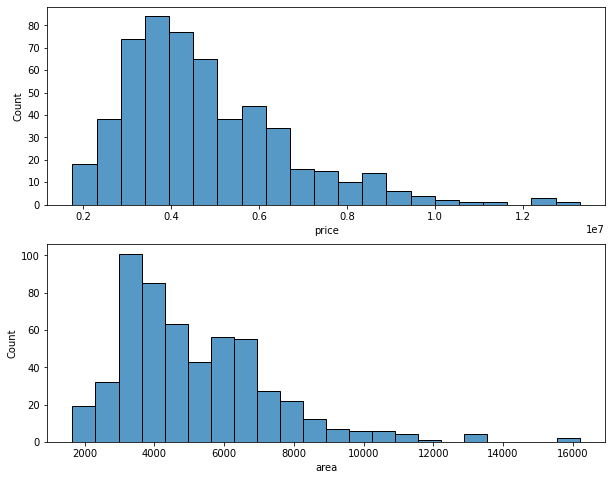

In [13]:
#plotting histogram using seaborn histplot

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.histplot(x='price',data = housedf)
plt.subplot(2,1,2)
sns.histplot(x='area',data = housedf)

plt.show()

From above histogram plot we can observe that both price and area is positively skewed. We can also observe some outliers in the data.

---



### Plotting box plots of categorical data variables against the price
This helps to visualize the change in price of house with the change in status of the independent variable.

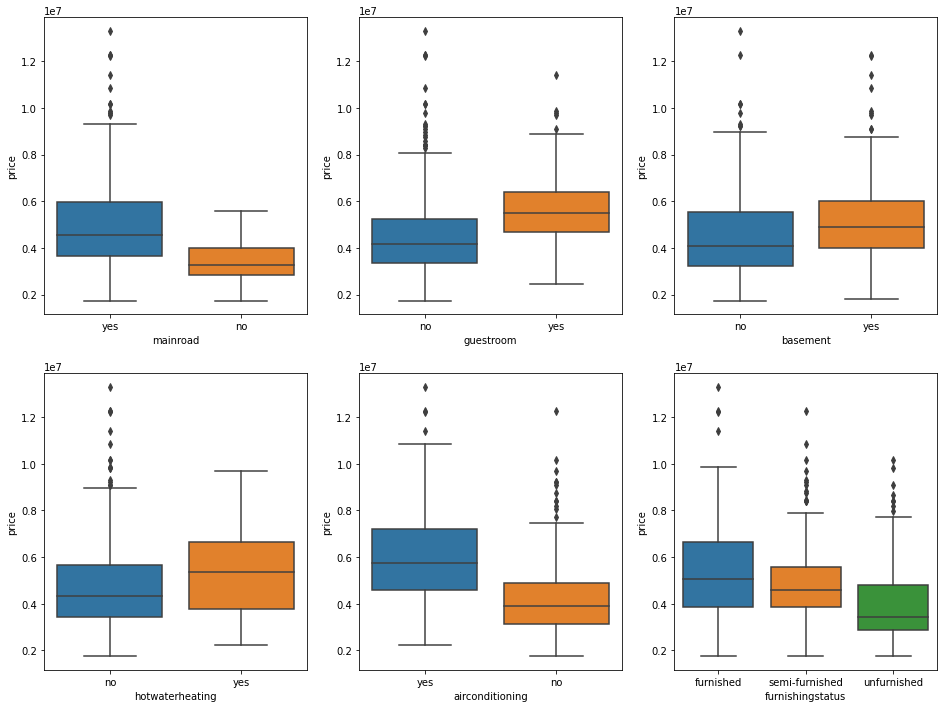

In [14]:
#using seaborn boxplot
#plotting multiple graphs using subplot

plt.figure(figsize=(16, 12))

plt.subplot(2,3,1) #2 rows, 3 columns, 1st index
# mainroad against price
sns.boxplot(x = 'mainroad', y = 'price', data = housedf)

plt.subplot(2,3,2) #2nd index
# guestroom against price
sns.boxplot(x = 'guestroom', y = 'price', data = housedf)

plt.subplot(2,3,3) #3rd index
# basement against price
sns.boxplot(x = 'basement', y = 'price', data = housedf)

plt.subplot(2,3,4) #4th index
# hotwaterheating against price
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housedf)

plt.subplot(2,3,5) #5th index
# airconditioning against price
sns.boxplot(x = 'airconditioning', y = 'price', data = housedf)

plt.subplot(2,3,6) #6th index
# furnishingstatus against price
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housedf)

plt.show()



---

**Count Plot**<br>
Count plot helps to visulaize the count of each category of data in the set of data. It is like a histogram for categorical data.

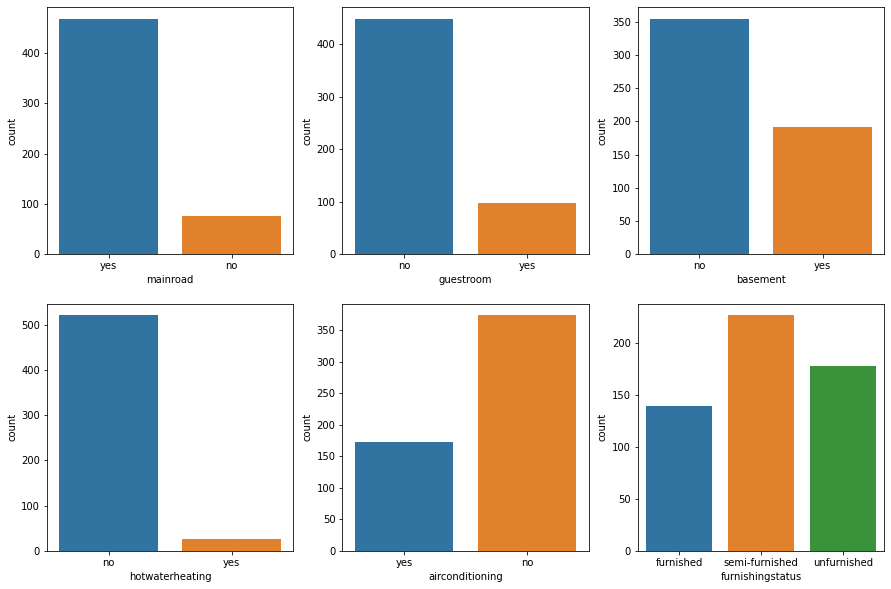

In [15]:
#using count plot from seaborn

#creating a figure with 2 rows and 3 columns to fit six plots
plt.figure(figsize=(15, 10))

plt.subplot(2,3,1) #1st index
sns.countplot(x = 'mainroad', data = housedf)

plt.subplot(2,3,2) #2nd index
sns.countplot(x = 'guestroom', data = housedf)

plt.subplot(2,3,3) #3rd index
sns.countplot(x = 'basement', data = housedf)

plt.subplot(2,3,4) #4th index
sns.countplot(x = 'hotwaterheating', data = housedf)

plt.subplot(2,3,5) #5th index
sns.countplot(x = 'airconditioning',  data = housedf)

plt.subplot(2,3,6) #6th index
sns.countplot(x = 'furnishingstatus', data = housedf)

plt.show()



---



## Data Transformation

Using LabelEncoder to normaize categorical data. LabelEncoder labels the categorical data with values between 0 and nclasses-1 (n is the no of distinct labels)<br>
Eg. LabelEncoder encodes yes to 1 and no to 0

In [16]:
# Using LabelEncoder to Encode all the categorical data to nominal data
from sklearn.preprocessing import LabelEncoder

#making instance of LabelEncoder
lEncoder = LabelEncoder()

#encoding all categorical data
housedf.mainroad = lEncoder.fit_transform(housedf.mainroad)
housedf.guestroom = lEncoder.fit_transform(housedf.guestroom)
housedf.basement = lEncoder.fit_transform(housedf.basement)
housedf.hotwaterheating = lEncoder.fit_transform(housedf.hotwaterheating)
housedf.airconditioning = lEncoder.fit_transform(housedf.airconditioning)
housedf.prefarea = lEncoder.fit_transform(housedf.prefarea)

In [ ]:
#viewing the encoded dataframe

housedf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished




---



**Encoding the furnishingstatus column using OneHotEncoder**<br>
The furnishingstatus column has three categories (furnished,un-furnished and semi-furnished). We could use LabelEncoder to encode the data to 0,1 and 2 but it has its disadvantages. Encoding the data to 0,1,2 can cause the model to assume that there is a hierarchy in the data. To avoid that we use OneHotEncoder to encode the three categories into 2 columns.

In [17]:
#importing OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

#drop='first' drops the first category i.e. furnished
ohEncoder = OneHotEncoder(sparse=False,drop='first',)

#encodes the furnishingstatus column and saves it into a new dataframe with two columns
encoded_df = pd.DataFrame(ohEncoder.fit_transform(housedf[['furnishingstatus']]))

#sets the name of the columns 
encoded_df.columns = ohEncoder.get_feature_names(['furnishing'])

encoded_df.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,furnishing_semi-furnished,furnishing_unfurnished
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,0.0,0.0


Here a dataframe with two columns are made [furnishing_semi-furnished and furnishing_unfurnished] . <br>
The category furnished is dropped as it is not required. When both semi-furnished and unfurnised are 0 it means furnished is 1.

In [18]:
#adding the new columns to the main dataframe using concat function of pandas
housedf = pd.concat([housedf,encoded_df], axis = 1)

#deleting the furnishingstatus column from dataframe
housedf.drop(['furnishingstatus'], axis =1, inplace = True)

#checking the updated dataframe
housedf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_semi-furnished,furnishing_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0.0,0.0




---

# Linear Regression Model

## Separating the data into independent variables and dependent varables
X = independent variable / features <br>
Y = dependent variable / target variable

In [19]:
# using iloc to select all the data except the first column for X
X=housedf.iloc[:,1:]

#using iloc to use only the first column as Y
Y=housedf.iloc[:,0]

In [20]:
#viewing X and Y separately

print(X.head())
print("---------------------")
print(Y.head())

   area  bedrooms  ...  furnishing_semi-furnished  furnishing_unfurnished
0  7420         4  ...                        0.0                     0.0
1  8960         4  ...                        0.0                     0.0
2  9960         3  ...                        1.0                     0.0
3  7500         4  ...                        0.0                     0.0
4  7420         4  ...                        0.0                     0.0

[5 rows x 13 columns]
---------------------
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


In [21]:
# calculating total no.of columns and rows in X 

n  = len(X.columns) #total columns
totRow = len(housedf) #total rows

print("No. of columns: ",n)
print("No.of rows: ",totRow)

No. of columns:  13
No.of rows:  545


### Normalizing the independent variable
All the data rows in X is scaled to 0-1 range.<br>
Normalization makes the features more consistent with each other, which allows the model to predict outputs more accurately.

In [22]:
#scaling the data of X
for i in range(0,n+1):

  X.iloc[:, :i]= X.iloc[:, :i]/np.max(X.iloc[:, :i])
  
#checking the scaled values of X
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_semi-furnished,furnishing_unfurnished
0,0.458025,0.666667,0.50,0.75,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0
1,0.553086,0.666667,1.00,1.00,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0
2,0.614815,0.500000,0.50,0.50,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0
3,0.462963,0.666667,0.50,0.50,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0
4,0.458025,0.666667,0.25,0.50,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0


### Linear Regression
We know the equation of best fit line is <br>
y = b1x1 + b2x2 +...+bnxn +c  <br>

b1,b2... are also called theta value

In [23]:
#initializing the theta value
#initially it is an array with 0 as values

theta = np.array([0]*n)

print("Initial Theta Values",theta)

Initial Theta Values [0 0 0 0 0 0 0 0 0 0 0 0 0]




---


y = b1x1 + b2x2 +...+bnxn +c <br>
y is the hypothesis normally called the predicted Y

In [24]:
#creating a function that returns the hypothsis
def hypothesis(theta,X):
  return theta*X



---



## Root Mean Square Error


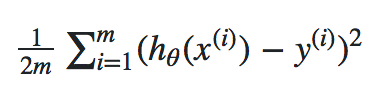

This is the cost function of Linear Regression. The cost function determines how far the prediction is from the original dependent variable. In machine learning the goal is to minimize the cost function so that the hypothesis/predicted value is close to the actual value.


In [25]:
#defining a function that calculates the cost function (RMSE)

def costFunc(X,actual_Y,theta):
  y_pred = hypothesis(theta,X)
  y_pred = np.sum(y_pred, axis = 1) #predicted y
  
  cal_rmse = (np.sum(y_pred - actual_Y)**2) / (2*totRow)
  return np.sqrt(cal_rmse) #returns the RMSE value

## Gradient Descent
It is an optimization algorithm that is used to find the value of coefficients  of a function that minimizes the cost function.<br>
The algorithm starts by defining initial parameter values and from there gradient descent uses calculas to iteratively adjust the hypothesis so that they minimize the cost function.<br><br>
Gradient Descent takes in four parameters,<br>
X--> Independent Variable<br>
Y--> Dependent Variable<br>
learning rate -->  it is the step size at each iteration while moving toward a minimum of a loss function<br>
iterations --> number of iterations that gradient descent will perform<br>

In [26]:
# X --> Feature variable
# actual_Y --> actual Dependent variable
# lrRate --> learing rate of the gradient descent
# ir --> number of iterations
def gradientDescent(X,actual_Y,theta,lrRate,itr):
  costInEachItr = []   #array that stores the cost at each iteration
  i = 0
  while i < itr:

     y_pred = hypothesis(theta,X)
     y_pred = np.sum(y_pred, axis = 1)

     for c in range(0,n):
       # calculating the value of theta using the theta formula
       theta[c]  = theta[c] - lrRate * (sum((y_pred-actual_Y)*(X.iloc[:,c])/n))

      #caculating the cost function
     cost = costFunc(X,actual_Y,theta)
      
      #appending each cost function of each iteration 
     costInEachItr.append(cost)

     i += 1
#gradient descent retuns the array of cost functions, the final cost function and the theta value
  return costInEachItr, cost, theta
      

In [27]:
#learning rate is 0.0001 and iteraions = 30000
#storing the returned value in variables

costInEachItr,cost,theta=gradientDescent(X,Y,theta,0.0001,30000)


In [28]:
#printing the theta value

print("Theta values: ",theta)

Theta values:  [3479238 1313495 3406530 1767374  476258  325913  337430  861464  887416
  909649  668679  -48161 -412025]


In [29]:
#printing the hypothesis / predicted value of Y

y_pred1 = hypothesis(theta, X)
y_pred1 = np.sum(y_pred1, axis=1)

print("Predicted value of y from gradient descent: ",y_pred1)

Predicted value of y from gradient descent:  0      8.136821e+06
1      1.024721e+07
2      7.423425e+06
3      8.352806e+06
4      6.838009e+06
           ...     
540    3.383707e+06
541    2.417505e+06
542    2.573000e+06
543    2.575198e+06
544    3.283156e+06
Length: 545, dtype: float64


## Linear Regression Model using sklearn

Scikit Learn is one of the most popular python library for machine learning due to its robust nature and easy functionality. It is a great medium for begineers to learn machine learning in python. Sckikit learn has various classification, regression and clustering algorithms that are bulit in and easy to use.

### Splitting Data
Splitting the dependent and independent variables into training and testing sets.<br>
This is done to understand the models' performance. We can train the model by using the training set and test the model by using the testing set.<br>
To split the data we use train_test_split function from sklearn library.

In [30]:
#importing train_test_split()
from sklearn.model_selection import train_test_split

#separating the data into X_train, X_test, Y_train, Y_test sets

# **parameters explained**
#test_size = size of the testing set, here test size is 0.30 meaning 30% of the total data will taken as testing set
#testing size is 30%, so training size is 70%

#random_state = defines the randomness of split in the data ,if random_state is not specified, 
# then each time the code is run, the pattern in the split of the data would change

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)


In [31]:
#checking the shape of the four splits
print("X_train: ",x_train.shape)
print("X_test: ",x_test.shape)
print("Y_train: ",y_train.shape)
print("Y_test: ",y_test.shape)

X_train:  (381, 13)
X_test:  (164, 13)
Y_train:  (381,)
Y_test:  (164,)


### Model Development and Prediction
Using LinearRegression function from sklearn to build the model by fitting the model with x_train and y_train

In [32]:
#importing LinearRegression from linear_model of sklearn
from sklearn.linear_model import LinearRegression

#using the default parameters of LinearRegression() for this model
regModel = LinearRegression()

#fitting the mdoel with x_train and y_train
regModel.fit(x_train,y_train)

#calculating the  hypothesis of our model i.e. y(predicted)
y_predicted = regModel.predict(x_test)


## Evaluating the Regression Model

r2 score is the accuracy of the model. 1 is the perfect score.

In [33]:
from sklearn.metrics import r2_score

print("Accuracy of model: ",r2_score(y_test,y_predicted))

Accuracy of model:  0.7245629970975958


In [35]:
#checking the theta and intercept values using coef_ and intercept_

theta_model = regModel.coef_
intercept = regModel.intercept_

print("Theta: ",theta_model)
print("\nY Intercept: ", intercept)

Theta:  [3995664.73014418  769643.25614049 3792743.29435736 1685342.44187337
  478260.79480497  385176.10584236  353539.58456534 1248046.21234594
  908687.59307457  658442.28020991  694592.19153418  -67113.46413836
 -445725.47889898]

Y Intercept:  51449.42919140495


### Evaluation Metrics
**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
∑ |y−y_predicted| * 1/n
 
**Mean Squared Error** (MSE) is the mean of the squared errors:
(∑(y−y_predicted)^2)*1/n
 
**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
√((∑(y−y_predicted)^2*)1/2n)

In [36]:
#calculating the values of MAE,MSE and RMSE using bulid in functions from sklearn.metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

# Mean Absolute Error
MAE= mean_absolute_error(y_test, y_predicted)

# Mean Squared Error
MSE=mean_squared_error(y_test, y_predicted)

# Root Mean Squared Error
RMSE= np.sqrt(MSE)

print("Mean Absolute Error: ",MAE)
print("Mean Squared Error: ",MSE)
print("Root Mean Square Error: ",RMSE)

Mean Absolute Error:  731779.349984632
Mean Squared Error:  955428862101.2493
Root Mean Square Error:  977460.4145955218


### Visualizing the predicted value
Plotting a scatter plot between the actual value of Y and the predicted Y.<br>
This will help to view the accuracy of the model in predicting the Y correctly.

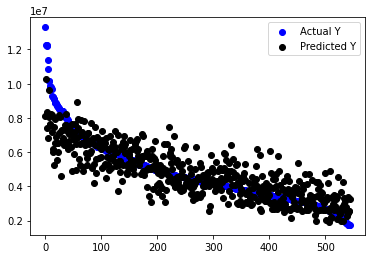

In [37]:
# using scatter plot from matplot library

# here x axis is the number of rows of data
# y axis is the values of actual and predicted Y

# the blue scatter is the actual value of Y
plt.scatter(x=list(range(0,totRow)),y= Y,color='blue')

# the black scatter is the predicted value of Y
plt.scatter(x=list(range(0,totRow)), y=y_pred1, color='black')

plt.legend(["Actual Y","Predicted Y"])
plt.show()



---


Plotting the scatter plot with predicted value of Y against real value of Y

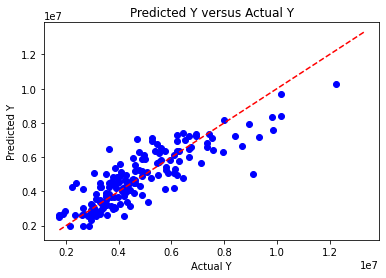

In [38]:
#scatter plot of predicted value of Y against real value of Y

plt.figure()

# x-axis is the actual value of Y
# y-axis is the predicted value of Y
plt.scatter(y_test,y_predicted, c='blue')

#staright line
X=Y
plt.plot(X,Y, "r--")   

plt.title('Predicted Y versus Actual Y')
plt.xlabel('Actual Y')                         
plt.ylabel('Predicted Y') 

plt.show()



---
Visualizing the Cost Function at different iterations


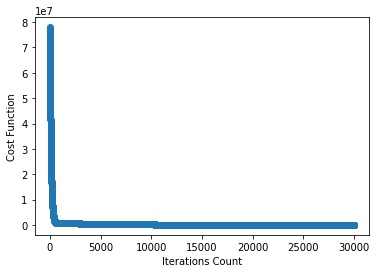

In [39]:
#Plottng the graph for cost function at all iterations

plt.figure()

# x-axis is the iteration count
# y-axis is the cost function at that iteration
plt.scatter(x=list(range(0,30000)), y=costInEachItr)

plt.ylabel('Cost Function')
plt.xlabel('Iterations Count')

plt.show()

From above plot we can observe that the error between the predicted Y and actual Y undergoes a uniform variation after reaching certain iterations.